In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

<h1>Research questions:</h1> 

In [21]:
def average(lst):
    return sum(lst)/len(lst)

In [2]:
with open('ex-man-export.json', 'r') as outfile:
    data = json.load(outfile)

In [22]:
services_array = []

for i in data["focusSessions"]:
    services_array.append(len(i["services"]))

average(services_array)


1.9545454545454546

In [26]:
print("Number of focus sessions: ", len(data))
print("Number of used services: ", round(average(services_array)))

Number of focus sessions:  7
Number of used services:  2


<h3>1. Does the blocking of notifications help people to be less distracted/more productive?  </h3>

<h6> Measure by perceived productivity in form of a popup-survey at the end of a focus session. </h6>

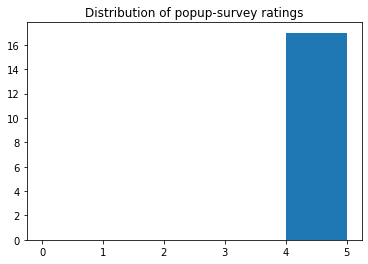

In [29]:
ratings = []
for i in data["focusSessions"]:
    
    rating = i.get("rating")
    if rating != None:
        ratings.append(rating)

averaged_rating = np.mean(ratings)

plt.hist(ratings, bins = [0,1,2,3,4,5 ], align = "mid")
plt.title("Distribution of popup-survey ratings")
plt.show()

<h6>How often the user tried to break the focusmode despite being in focus?</h6>

In [31]:
brokenFocus = []
for i in data["focusSessions"]:
    breakFocus = i.get("brokenFocus")
    if breakFocus != None:
        brokenFocus.append(len(breakFocus))

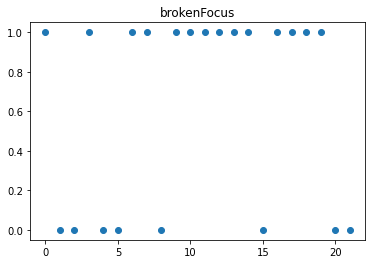

In [32]:
plt.scatter([i for i in range(len(brokenFocus))],brokenFocus)
plt.title("brokenFocus")
plt.show()

<h6>look at number of messages received/replied to in focus mode and compare to numbers outside of focus session</h6>

In [37]:
messages_received = []

for i in data["focusSessions"]:
    message_perFocus = []
    for message in i["services"]:
        print(message)
        message_perFocus.append(message["messages"])
    messages_received.append(message_perFocus)
    
messages = np.asarray(messages_received)



{'id': '79eb71d2-406d-4181-a2a9-d4572571c385', 'name': 'slack', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1603142511095, 1603142513198]]}
{'id': '1a675a62-e2d0-4013-a1d7-ed0a7a86fdb8', 'name': 'whatsapp', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1603142508852, 1603142511101]]}
{'id': '79eb71d2-406d-4181-a2a9-d4572571c385', 'name': 'slack', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': []}
{'id': '79eb71d2-406d-4181-a2a9-d4572571c385', 'name': 'slack', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': []}
{'id': '79eb71d2-406d-4181-a2a9-d4572571c385', 'name': 'slack', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': [[1603181802100, 1603181806437]]}
{'id': '79eb71d2-406d-4181-a2a9-d4572571c385', 'name': 'slack', 'unreadCount': 0, 'autoReplied': [], 'messages': [], 'interactions': []}
{'id': 'e6281e31-3b9f-47b5-a9a6-5c5c2e7cbe27', 'name': 'whatsapp', 'unreadCount': 2, 

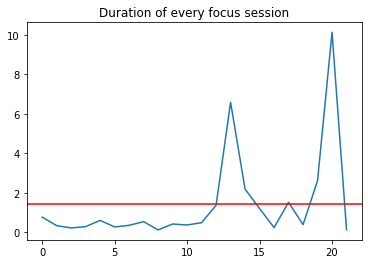

In [34]:
import datetime

focus_length = []

for i in data["focusSessions"]:
    startTime = datetime.datetime.fromtimestamp(round(i["startTime"]/1000))
    endTime = datetime.datetime.fromtimestamp(round(i["endTime"]/1000))
    
    duration = (endTime - startTime).total_seconds() / 60
    
    focus_length.append(duration)
    

plt.plot([t for t in range(len(focus_length))],focus_length)
plt.axhline(y=np.mean(focus_length), color='r', linestyle='-')
plt.title("Duration of every focus session")
plt.show()

In [35]:
plt.plot([i for i in range(len(whatsApp))],whatsApp//focus_length,label='whatsApp')
plt.plot([i for i in range(len(whatsApp))],slack//focus_length, label='slack')
plt.title("distributed messages per minuted per service over all focus sessions")
plt.legend()
plt.show()

NameError: name 'whatsApp' is not defined

In [ ]:
aggregated_messages = messages.sum(axis = 1)

plt.plot([i for i in range(len(aggregated_messages))], aggregated_messages//focus_length)
plt.title("aggregated messages per minute over all focus sessions")
plt.show()